In [10]:
#https://github.com/marcyves/COVID19-Python/blob/master/COVID-19%20France%20Evolution.ipynb

In [11]:
import pandas as pd
# Read all data
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").dropna()
print(df.head())

df

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  30/05/2020   30      5  2020    623      11             Afghanistan    AF   
1  29/05/2020   29      5  2020    580       8             Afghanistan    AF   
2  28/05/2020   28      5  2020    625       7             Afghanistan    AF   
3  27/05/2020   27      5  2020    658       1             Afghanistan    AF   
4  26/05/2020   26      5  2020    591       1             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
1,29/05/2020,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
2,28/05/2020,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
3,27/05/2020,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
4,26/05/2020,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
20288,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
20289,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
20290,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
20291,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [12]:
# Get French data
df_fr = df[df.countriesAndTerritories == 'France']

# Retain only date, cases and deaths columns
df_fr = df_fr[['dateRep', 'cases', 'deaths']]

df_fr

,dateRep,cases,deaths
6688,30/05/2020,597,52
6689,29/05/2020,3325,66
6690,28/05/2020,191,66
6691,27/05/2020,276,98
6692,26/05/2020,358,65
...,...,...,...
6835,04/01/2020,0,0
6836,03/01/2020,0,0
6837,02/01/2020,0,0
6838,01/01/2020,0,0


In [13]:
# Calculate cumulative cases & deaths
df_fr = df_fr.sort_values('dateRep')
df_fr['cumCases'] = df_fr.cases.cumsum()
df_fr['cumDeaths'] = df_fr.deaths.cumsum()

df_fr

,dateRep,cases,deaths,cumCases,cumDeaths
6838,01/01/2020,0,0,0,0
6807,01/02/2020,0,0,0,0
6778,01/03/2020,43,0,43,0
6747,01/04/2020,7578,499,7621,499
6717,01/05/2020,1139,289,8760,788
...,...,...,...,...,...
6718,30/04/2020,1607,427,144694,28244
6688,30/05/2020,597,52,145291,28296
6808,31/01/2020,1,0,145292,28296
6748,31/03/2020,4376,418,149668,28714


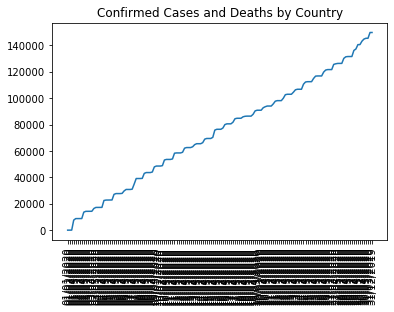

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df_fr.dateRep,df_fr.cumCases)

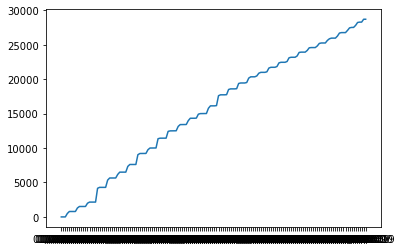

In [15]:
plt.plot(df_fr.dateRep, df_fr.cumDeaths)

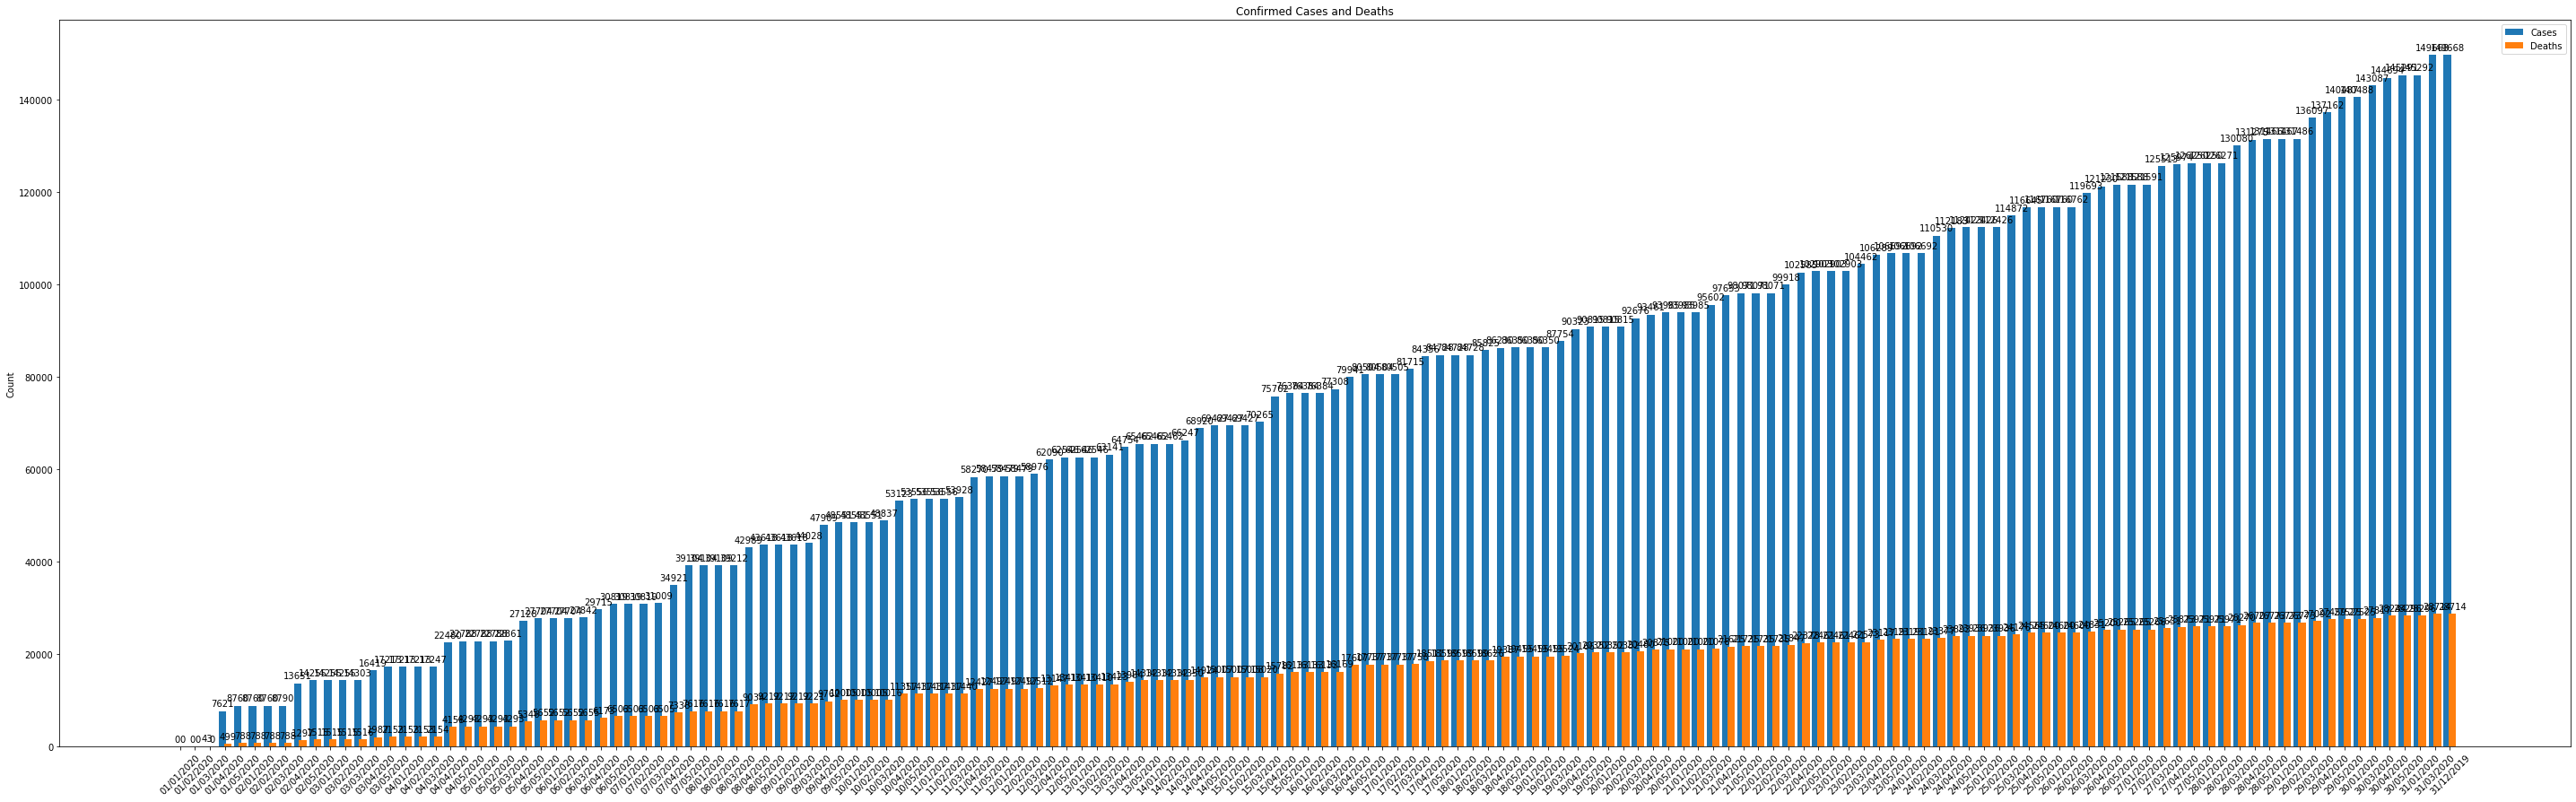

In [16]:
import numpy as np

x = np.arange(len(df_fr.dateRep))  # the label are dates
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(40,12))
rects1 = ax.bar(x - width/3, df_fr.cumCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df_fr.cumDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(df_fr.dateRep)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()
